In [1]:
__author__ = "me"
__date__ = "2015_10_13"

%pylab inline
import pandas as pd
import numpy as np
import geopandas as gp

import pylab as plt
import os

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)

PARQA = os.getenv('PARQA')

Populating the interactive namespace from numpy and matplotlib


/Users/casy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
insps = pd.read_csv(PARQA + "data/All_Inspections.csv",index_col=0)
litter = insps[insps.Litter==1]
nolitter = insps[insps.Litter==0]

In [14]:
pid_l =  litter.groupby('Prop ID').size()
pid_n = nolitter.groupby('Prop ID').size()

df = pd.concat([pid_l,pid_n],axis=1).rename(columns={0:'failed',1:'passed'})
df['total'] = df.failed + df.passed

In [15]:
df.head()

,failed,passed,total
B001,3,15,18
B002,5,14,19
B003,2,19,21
B006,6,5,11
B007,5,6,11


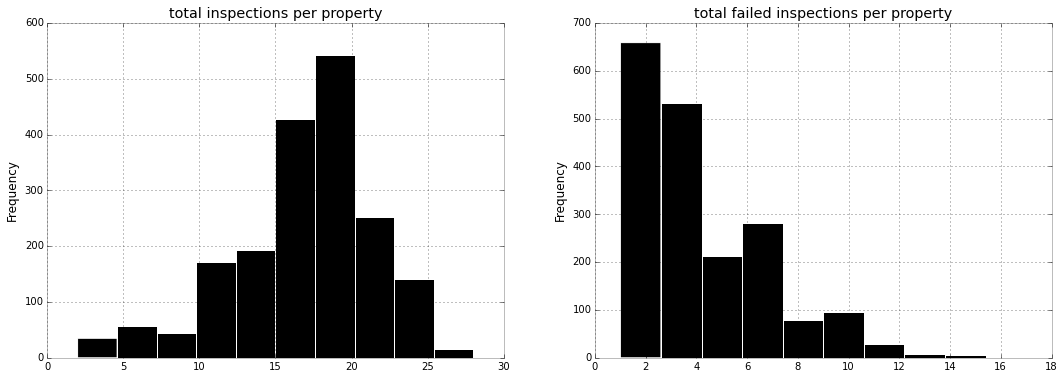

In [26]:
fig, axes = plt.subplots(1,2, figsize=(18,6))

df.total.plot(kind='hist',color='k',ax=axes[0], title='total inspections per property')
df.failed.plot(kind='hist',color='k',ax=axes[1], title='total failed inspections per property')

plt.savefig(PARQA + "parqa/Inspections/fails_per_park.png")

In [25]:
print 'Percentage of parks at least N times failed litter:'
for x in xrange(1,10):
    print 'N=', x, '     ', 100.0*len(df[df.failed>=x])/len(df)

Percentage of parks at least N times failed litter:
N= 1       85.0626118068
N= 2       69.6779964222
N= 3       55.5903398927
N= 4       43.6940966011
N= 5       31.7531305903
N= 6       22.2271914132
N= 7       14.8032200358
N= 8       9.66010733453
N= 9       6.12701252236


## Calls

In [30]:
calls = pd.read_csv(PARQA + 'data/311/311_rPID_litter.csv', index_col=0)

In [33]:
complains = calls.groupby('rParkID').size()

In [34]:
df['calls'] = complains

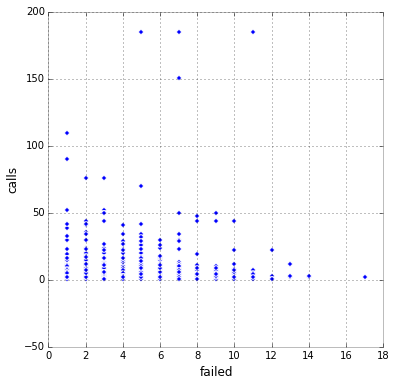

In [42]:
df.plot(kind='scatter', x='failed',y='calls', figsize=(6,6))
plt.savefig(PARQA + 'parqa/Inspections/inspections_calls.png')

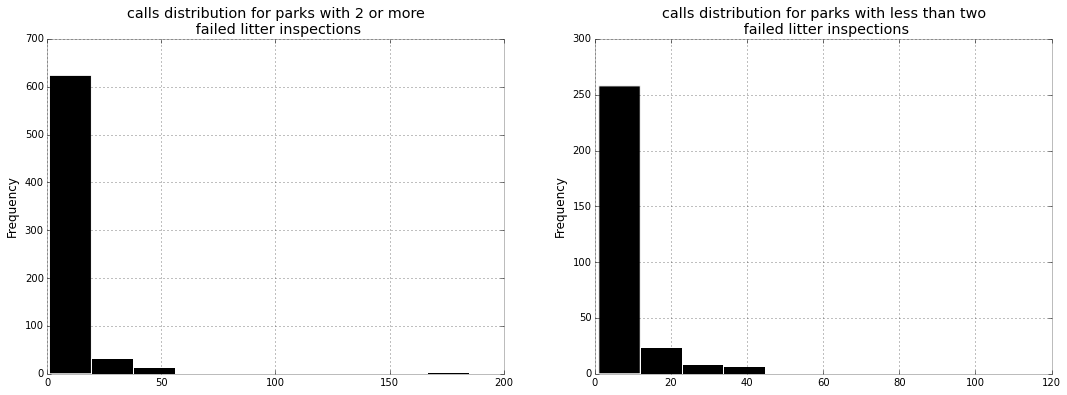

In [44]:
fig, axes = plt.subplots(1,2, figsize=(18,6))


df.calls[df.failed>2].plot(kind='hist', color='k', ax=axes[0],  title='calls distribution for parks with 2 or more\n failed litter inspections')
df.calls[df.failed<=2].plot(kind='hist', color='k', ax=axes[1], title='calls distribution for parks with less than two\n failed litter inspections')

plt.savefig(PARQA + 'parqa/Inspections/calls_distribution.png')